In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from matplotlib.image import imread
%matplotlib inline
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D,Dropout, Flatten, Dense
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder # one-hot encoding for age
from keras.utils import to_categorical
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2
import os
import sys
sns.set_theme()

import tensorflow 
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import MaxPooling2D
from keras.utils import to_categorical
from sklearn import metrics
from matplotlib import cm
import itertools
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import datasets, layers, models
import pyspark
from pyspark import SparkContext
import findspark
# Défintion d'un SparkContext
sc = SparkContext.getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/03/19 18:33:28 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/03/19 18:33:29 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [2]:
df = pd.DataFrame(columns=('name','type','country','disease','color','context','cause', 'description', '6 first week', 'level control', 'nutriment', 'eau'))

In [122]:
df['type'] = 'Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'nonsegmented','Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet' 
df['name'] = 'Apple','Blueberry','Cherry', 'Corn', 'Grape', 'Orange', 'Peach', 'Pepper', 'Potato','Raspberry', 'Soybean', 'Squash', 'Strawberry', 
df['disease'] = 'Healthy'


In [123]:
#imgpath = os.open('1.png','w')
#img = img.imread('/Downloads/1.png')
#os.open(str('plant.csv'),'w')
#path = os.path.realpath(__file__)
#print("Le chemin du script est : " + path)
os.listdir('1.png')

FileNotFoundError: [Errno 2] No such file or directory: '1.png'

In [124]:
dm = pd.DataFrame(columns=('id','Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'nonsegmented','Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet'))

dm['id'] = np.arange(1,1000)
dm

,id,Black-grass,Charlock,Cleavers,Common Chickweed,Common wheat,Fat Hen,Loose Silky-bent,Maize,nonsegmented,Scentless Mayweed,Shepherds Purse,Small-flowered Cranesbill,Sugar beet
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
Blackgrass = np.arange(1,334)
Charlock = np.arange(1,454)
Cleavers = np.arange(1,348)
CommonChickweed = np.arange(1,716)
Commonwheat = np.arange(1,258)
FatHen =np.arange(1,543)
LooseSilkybent = np.arange(1,805)
Maize = np.arange(1,260)
nonsegmented = np.arange(1,454)
ScentlessMayweed = np.arange(1,608)
ShepherdsPurse = np.arange(1,276)
SmallfloweredCranesbill = np.arange(1,580)
Sugarbeet = np.arange(1,464)


In [126]:
df = pd.read_csv('plant.csv', sep=';')

In [127]:
df = df.drop('Unnamed: 0',axis=1)
df.head()

,Black-grass,Charlock,Cleavers,Common Chickweed,Common wheat,Fat Hen,Loose Silky-bent,"Maize',",Scentless Mayweed,Shepherds Purse,Small-flowered Cranesbill,Sugar beet,nonsegmented
0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0
1,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0
2,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3.0,3.0,3.0,3.0,3.0
3,4.0,4.0,4.0,4.0,4.0,4.0,4,4.0,4.0,4.0,4.0,4.0,4.0
4,5.0,5.0,5.0,5.0,5.0,5.0,5,5.0,5.0,5.0,5.0,5.0,5.0


In [128]:
graph = df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Black-grass                334 non-null    float64
 1   Charlock                   454 non-null    float64
 2   Cleavers                   348 non-null    float64
 3   Common Chickweed           716 non-null    float64
 4   Common wheat               258 non-null    float64
 5   Fat Hen                    543 non-null    float64
 6   Loose Silky-bent           805 non-null    int64  
 7   Maize',                    260 non-null    float64
 8   Scentless Mayweed          454 non-null    float64
 9   Shepherds Purse            608 non-null    float64
 10  Small-flowered Cranesbill  276 non-null    float64
 11  Sugar beet                 580 non-null    float64
 12  nonsegmented               464 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 81.9 KB


In [129]:
dm = pd.DataFrame(columns=('id','type'))
dm['type'] = 'Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'nonsegmented','Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet'
dm['value'] = 334,454,348,716,258,543,805,260,454,608,276,580,464

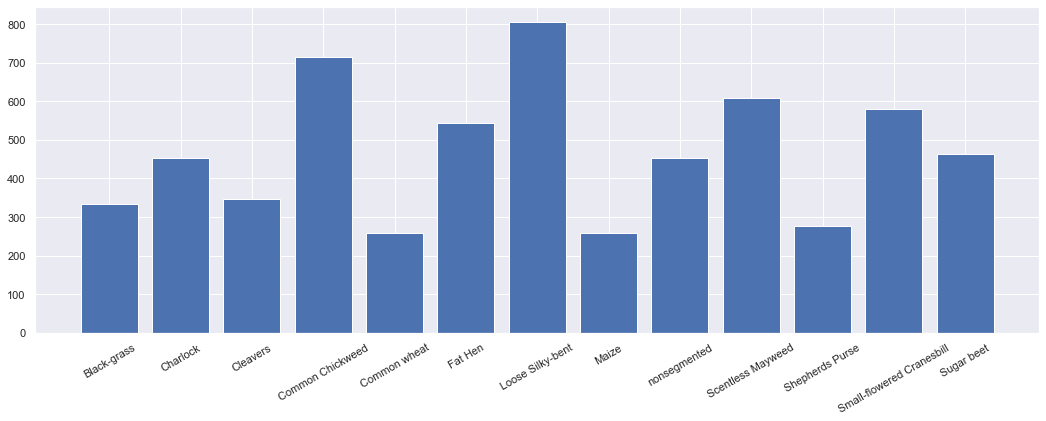

In [130]:
plt.figure(figsize=(18,6))
plt.bar(dm.type,dm.value)
plt.xticks(rotation=30)
plt.show()

In [131]:
dm['name'] = 'Apple','Cherry', 'Corn', 'Grape', 'Orange', 'Peach', 'Pepper', 'Potato','Raspberry', 'Soybean', 'Squash', 'Strawberry','Tomato'
dm['disease'] = 3, 1, 3, 3, 1, 1, 1, 2, 0, 0, 1, 1, 9

<BarContainer object of 13 artists>

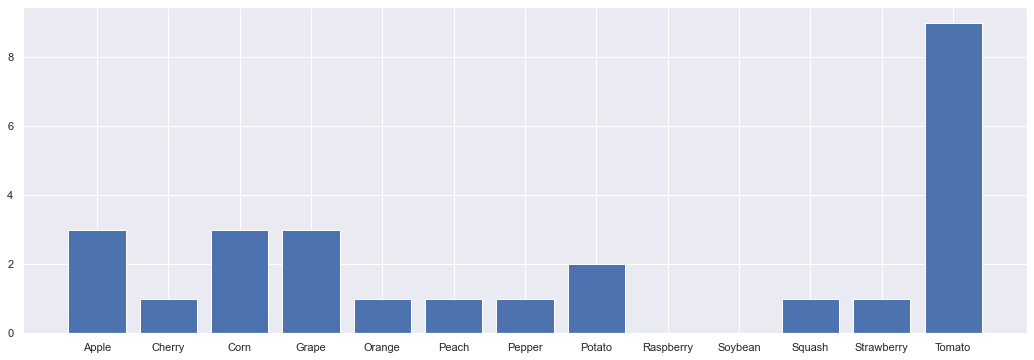

In [132]:
plt.figure(figsize=(18,6))
plt.bar(dm.name, dm.disease)

In [2]:
# Librairie principale

import os
os.sys.path
import matplotlib.image as img
from matplotlib.image import imread

import cv2

In [134]:
from pathlib import Path 
import os 
myDirectory="c:/users" 
p = Path(myDirectory) 
for x in os.scandir(p): 
    print(x)

FileNotFoundError: [Errno 2] No such file or directory: 'c:/users'

In [ ]:
#path = 'Users/dalvikloger/Desktop/DataBase/archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___healthy/0055dd26-23a7-4415-ac61-e0b44ebfaf80__RS_HL 5672.JPG'
#pathv = 'Downloads/1.png'
#files = os.listdir(pathv)
#apple = cv2.imread('Users/dalvikloger/Desktop/DataBase/archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___healthy/0055dd26-23a7-4415-ac61-e0b44ebfaf80__RS_HL 5672.JPG')
testpath = os.path.abspath("3.jpg")
test = cv2.imread(str(testpath), cv2.IMREAD_COLOR)
newImg = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
plt.imshow(newImg)
plt.xticks([])
plt.yticks([])
plt.show()
#os.chdir('/Users/dalvikloger/Desktop/DataBase/3.jpg')
#plt.imshow(np.real(test))
#plt.show()
#os.path.exists("3.jpg")

#cv2.imshow('image', AppleH)


In [ ]:
AppleH = cv2.imread('Pictures/Rav4_1.jpg', 1)

In [ ]:
carton = cv2.imread('boite_AC_1.jpg', cv2.IMREAD_COLOR)


In [ ]:
 plt.imshow(AppleH, cmap = 'gray')

In [ ]:
os.getcwd()
#os.curdir()
#os.listdir("3.png")

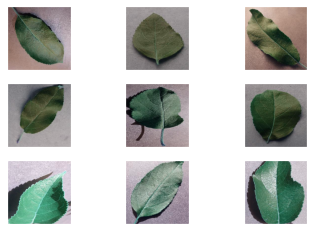

In [4]:
#testpath = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___healthy/0a285c8b-1c31-48d4-89f2-af8b9edc36f6___RS_HL 5759.jpg")
##test = cv2.imread(str(testpath), cv2.IMREAD_COLOR)
#newImg = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
#plt.imshow(newImg)
#plt.xticks([])
#plt.yticks([])
#plt.show()

#cat_Apple = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train")
cat_Apple_H = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___healthy")
cat_Apple_B = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Black_rot")
cat_Apple_S = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab")
cat_Apple_C = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Cedar_apple_rust")
Blueberry = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Blueberry___healthy")
Cherry_H = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Cherry_(including_sour)___healthy")
Cherry_P = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Cherry_(including_sour)___Powdery_mildew")
Corn_cer = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot")
Corn_com =os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Common_rust_")
Corn_H = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___healthy")
Corn_N = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Northern_Leaf_Blight")
Corn_E= os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Black_rot")
Grap_B = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Esca_(Black_Measles)")
Grape_H = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___healthy")
Grape_L = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)")
Orange = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Orange___Haunglongbing_(Citrus_greening)")
Peach_B = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Peach___Bacterial_spot")
Peach_h = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Peach___healthy")
Pepper_B = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Pepper,_bell___Bacterial_spot")
Pepper_H = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Pepper,_bell___healthy")
Potato_H = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___Early_blight")
Potato_E = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___healthy")
Potato_L = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___Late_blight")
Raspberry = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Raspberry___healthy")
Soybean = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Soybean___healthy")
Squash = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Squash___Powdery_mildew")
Straw_H = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Strawberry___healthy")
Straw_L = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Strawberry___Leaf_scorch")
Tomato_B = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot")
Tomato_E = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight")
Tomato_H = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy")
Tomato_Late = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight")
Tomato_Leaf = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold")
Tomato_Sep = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot")
Tomato_Spider = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite")
Tomato_TS =os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot")
Tomato_M =os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus")
Tomato_Y = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus")

list_img_Apple_H = os.listdir(cat_Apple_H)
list_img_Apple_B = os.listdir(cat_Apple_B)
list_img_Apple_S = os.listdir(cat_Apple_S)
list_img_Apple_C = os.listdir(cat_Apple_C)
list_blueberry = os.listdir(Blueberry)
list_Cherry_H = os.listdir(Cherry_H)
list_Cherry_P = os.listdir(Cherry_P)
list_Corn_Cer = os.listdir(Corn_cer)
list_Corn_com = os.listdir(Corn_com)
list_Corn_H = os.listdir(Corn_H)
list_Corn_N = os.listdir(Corn_N)
list_Corn_E = os.listdir(Corn_E)
list_Grap_B = os.listdir(Grap_B)
list_Grape_H = os.listdir(Grape_H)
list_Grape_L = os.listdir(Grape_L)
list_Orange = os.listdir(Orange)
list_Peach_B = os.listdir(Peach_B)
list_Peach_h = os.listdir(Peach_h)
list_Pepper_B = os.listdir(Pepper_B)
list_Pepper_H = os.listdir(Pepper_H)
list_Potato_H = os.listdir(Potato_H)
list_Potato_E = os.listdir(Potato_E)
list_Potato_L = os.listdir(Potato_L)
list_Raspberry = os.listdir(Raspberry)
list_Soybean = os.listdir(Soybean)
list_Squash = os.listdir(Squash)
list_Straw_H = os.listdir(Straw_H)
list_Straw_L = os.listdir(Straw_L)
list_Tomato_B = os.listdir(Tomato_B)
list_Tomato_E = os.listdir(Tomato_E)
list_Tomato_H =os.listdir(Tomato_H)
list_Tomato_Late = os.listdir(Tomato_Late)
list_Tomato_Leaf = os.listdir(Tomato_Leaf)
list_Tomato_sep = os.listdir(Tomato_Sep)
list_Tomato_spider = os.listdir(Tomato_Spider)
list_Tomato_TS = os.listdir(Tomato_TS)
list_Tomato_M = os.listdir(Tomato_M)
list_Tomato_Y = os.listdir(Tomato_Y)

img_Train = []
img_Apple_H =[]
img_Apple_B =[]
img_Apple_S =[]
img_Apple_C =[]
img_Apple = []
for image in list_img_Apple_H:
    img_Apple_H.append(cv2.imread(os.path.join(cat_Apple_H, image)))
    img_Train.append(cv2.imread(os.path.join(cat_Apple_H, image)))
for image in list_img_Apple_B:
    img_Apple_B.append(cv2.imread(os.path.join(cat_Apple_B, image)))
    img_Train.append(cv2.imread(os.path.join(cat_Apple_B, image)))
for image in list_img_Apple_S:
    img_Apple_S.append(cv2.imread(os.path.join(cat_Apple_S, image)))
    img_Train.append(cv2.imread(os.path.join(cat_Apple_S, image)))
for image in list_img_Apple_C:
    img_Apple_C.append(cv2.imread(os.path.join(cat_Apple_C, image)))
    img_Train.append(cv2.imread(os.path.join(cat_Apple_C, image)))
for image in list_blueberry:
    img_Train.append(cv2.imread(os.path.join(Blueberry, image)))
for image in list_Cherry_H:
    img_Train.append(cv2.imread(os.path.join(Cherry_H, image)))
for image in list_Cherry_P:
    img_Train.append(cv2.imread(os.path.join(Cherry_P, image)))
for image in list_Corn_Cer:
    img_Train.append(cv2.imread(os.path.join(Corn_cer, image)))
for image in list_Corn_com:
    img_Train.append(cv2.imread(os.path.join(Corn_com, image)))
for image in list_Corn_H:
    img_Train.append(cv2.imread(os.path.join(Corn_H, image)))
for image in list_Corn_N:
    img_Train.append(cv2.imread(os.path.join(Corn_N, image)))
for image in list_Corn_E:
    img_Train.append(cv2.imread(os.path.join(Corn_E, image)))
for image in list_Grap_B:
    img_Train.append(cv2.imread(os.path.join(Grap_B, image)))
for image in list_Grape_H:
    img_Train.append(cv2.imread(os.path.join(Grape_H, image)))
for image in list_Grape_L:
    img_Train.append(cv2.imread(os.path.join(Grape_L, image)))
for image in list_Orange:
    img_Train.append(cv2.imread(os.path.join(Orange, image)))
for image in list_Peach_B:
    img_Train.append(cv2.imread(os.path.join(Peach_B, image)))
for image in list_Peach_h:
    img_Train.append(cv2.imread(os.path.join(Peach_h, image)))
for image in list_Pepper_B:
    img_Train.append(cv2.imread(os.path.join(Pepper_B, image)))
for image in list_Pepper_H:
    img_Train.append(cv2.imread(os.path.join(Pepper_H, image)))
for image in list_Potato_H:
    img_Train.append(cv2.imread(os.path.join(Potato_H, image)))
for image in list_Potato_E:
    img_Train.append(cv2.imread(os.path.join(Potato_E, image)))
for image in list_Potato_L:
    img_Train.append(cv2.imread(os.path.join(Potato_L, image)))
for image in list_Raspberry:
    img_Train.append(cv2.imread(os.path.join(Raspberry, image)))
for image in list_Soybean:
    img_Train.append(cv2.imread(os.path.join(Soybean, image)))
for image in list_Squash:
    img_Train.append(cv2.imread(os.path.join(Squash, image)))
for image in list_Straw_H:
    img_Train.append(cv2.imread(os.path.join(Straw_H, image)))
for image in list_Straw_L:
    img_Train.append(cv2.imread(os.path.join(Straw_L, image)))
for image in list_Tomato_B:
    img_Train.append(cv2.imread(os.path.join(Tomato_B, image)))
for image in list_Tomato_E:
    img_Train.append(cv2.imread(os.path.join(Tomato_E, image)))
for image in list_Tomato_H:
    img_Train.append(cv2.imread(os.path.join(Tomato_H, image)))
for image in list_Tomato_Late:
    img_Train.append(cv2.imread(os.path.join(Tomato_Late, image)))
for image in list_Tomato_Leaf:
    img_Train.append(cv2.imread(os.path.join(Tomato_Leaf, image)))
for image in list_Tomato_sep:
    img_Train.append(cv2.imread(os.path.join(Tomato_Sep, image)))
for image in list_Tomato_spider:
    img_Train.append(cv2.imread(os.path.join(Tomato_Spider, image)))
for image in list_Tomato_TS:
    img_Train.append(cv2.imread(os.path.join(Tomato_TS, image)))
for image in list_Tomato_M:
    img_Train.append(cv2.imread(os.path.join(Tomato_M, image)))
for image in list_Tomato_Y:
    img_Train.append(cv2.imread(os.path.join(Tomato_Y, image)))


#affichage des 9 premiès images (img) sous forme de plt.subplot en matrice 3x3
#fig, ax = plt.subplots(3, 3, subplot_kw=dict(xticks=[], yticks=[]))#for i, axi in enumerate(ax.flat):
    #axi.imshow(img[i], cmap='gray')
fig, ax = plt.subplots(3, 3, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(img_Train[i], cmap='gray')
    
#number_of_images = 6 #Définir le nombre x d'images à afficher 
#plt.figure(figsize=(10,10))
#age_folder = cat_Apple_H
#images = os.listdir(age_folder)[:number_of_images] # Selectionner aléatoirement x images
#for i in range(number_of_images):
 #   file = img.imread(age_folder +'/'+ images[i])
  #  plt.subplot(number_of_images,2,i+1)
   # plt.xticks([])
    #plt.yticks([])
    #plt.imshow(file)

In [ ]:
img_Apple =[]
list_img_Apple = os.path.dirname("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train")
for cat in list_img_Apple :
    for image in list_img_Apple_H:
        img_Apple.append(cv2.imread(os.path.join(cat_Apple_H, image)))
#img_Apple
#os.path.basename(cat_Apple_H)

In [ ]:
img_Apple = []
for path, dirs, files in os.walk(list_img_Apple):
    for filename in files:
        img_Apple.append(filename)
len(img_Apple)
#affichage des 9 premiès images (img) sous forme de plt.subplot en matrice 3x3
fig, ax = plt.subplots(3, 3, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
     axi.imshow(img[i], cmap='gray')

In [ ]:
img_train = []
list_img_train = os.path.abspath("archive-2")
for path, dirs, files in os.walk(list_img_train):
    for filename in files:
        img_train.append(filename)
        
    
len(img_train)


In [ ]:
from os import walk
liste = os.path.dirname("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab")

listeFichiers = []
from os import listdir
from os.path import isfile, join
fichiers = [f for f in listdir(liste)]
fichiers

image_path = os.path.abspath(f for f in listdir(liste))

    #fig, ax = plt.subplots(3, 3, subplot_kw=dict(xticks=[], yticks=[]))
#for i, axi in enumerate(ax.flat):
 #   axi.imshow(img_train[i], cmap='gray')

In [4]:
#from interaction_cnn import show_operation_conv
#show_operation_conv()
#from interaction_cnn import show_conv
#show_conv()
#from interaction_cnn import show_maxpool
#show_maxpool()
#from interaction_cnn import show_dropout
#show_dropout()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/02/27 20:41:00 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [ ]:
#Réaugmentée le dataset selon la balance des blancs
ImageDataGenerator(rescale=1./255)

In [ ]:
plant2 = sc.textFile("bestsellers.csv")

In [ ]:
plant2.take(5)

In [ ]:
plant2 = plant2.map(lambda x : x.lower().replace(',', ' ').replace('.', ' ').replace('-', ' ').replace('’', ' '))

In [ ]:
plant2.take(5)

In [ ]:
number_of_images = 6 #Définir le nombre x d'images à afficher 
plt.figure(figsize=(10,10))
age_folder = cat_Apple_H
images = os.listdir(age_folder)[:number_of_images] # Selectionner aléatoirement x images
for i in range(number_of_images):
    file = img.imread(age_folder +'/'+ images[i])
    plt.subplot(number_of_images,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(file)

In [ ]:
image_path = os.path.abspath("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/trainbis")
#os.remove("/Users/dalvikloger/Desktop/DataBase/archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/trainbis/.DS_Store")
X = []
Y = []
width = 100
height = 100 # resize to 100x100 to solve the RAM issue in Kaggle notebooks

for folder_name,_,filenames in os.walk(image_path):
        for file in filenames:
            file_path = folder_name +"/"+ file
            image = Image.open(file_path)
            image = image.convert('RGB')
            image = image.resize((width, height))
            X.append(np.array(image))
            Y.append(file[])


In [ ]:
X = np.array(X)
X = X.astype('float32')
X /= 255.0
# confirm the normalization
print('Min: %.3f, Max: %.3f' % (X.min(), X.max()))
Y = np.array(Y)

In [ ]:
Y[8]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,shuffle=True, stratify=Y)   

In [ ]:
print('Age =',Y_train[18])
plt.imshow(X_train[18])
plt.xticks([])
plt.yticks([])
plt.show()

len(X_train)

In [ ]:
train_datagen = ImageDataGenerator(
    shear_range = 0.2, # random application of shearing
    zoom_range = 0.2,
    horizontal_flip = True,
    rescale=1./255)
test_datagen = ImageDataGenerator()

In [ ]:
train_dataset = train_datagen.flow(X_train,Y_train, batch_size = 128)
test_dataset = test_datagen.flow(X_test, Y_test, batch_size = 128) 

In [ ]:
plt.imshow(X_train[18])
plt.xticks([])
plt.yticks([])
plt.show()
X_train[18].shape

In [12]:
from tensorflow.keras.callbacks import Callback
from timeit import default_timer as timer

class TimingCallback(Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

In [13]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping,ModelCheckpoint

early_stopping = EarlyStopping(
                                patience=5, # Attendre 5 epochs avant application
                                min_delta = 0.01, # si au bout de 5 epochs la fonction de perte ne varie pas de 1%, 
                                verbose=1, # Afficher à quel epoch on s'arrête
                                mode = 'min',
                                monitor='val_loss')

reduce_learning_rate = ReduceLROnPlateau(
                                    monitor="val_loss",
                                    patience=3, #si val_loss stagne sur 3 epochs consécutives selon la valeur min_delta
                                    min_delta= 0.01,
                                    factor=0.1,  # On réduit le learning rate d'un facteur 0.1
                                    cooldown = 4, # On attend 4 epochs avant de réitérer 
                                    verbose=1)

time_callback = TimingCallback()


In [ ]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",
                padding="valid",
                kernel_regularizer=regularizers.l2(0.00001),
                input_shape=(100, 100, 3)))

model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1,activation="sigmoid")) 


In [ ]:
model.compile(optimizer="adam",loss="binarycrossentropy",metrics=['accuracy'])

In [ ]:
batch_size = 128
epochs = 20 
model_history = model.fit(
            train_dataset, # use augmented images for train 
            steps_per_epoch=X_train.shape[0] // batch_size,
            validation_data = test_dataset, # use augmented images for test
            epochs = epochs,
            callbacks = [
                         reduce_learning_rate,
                         early_stopping,
                         time_callback
                        ],
            verbose=True)

In [ ]:
train_loss = model_history.history["loss"]
val_loss = model_history.history["val_loss"]
train_acc = model_history.history["mean_absolute_error"]
val_acc = model_history.history["val_mean_absolute_error"]

In [ ]:
plt.figure(figsize = (20, 8))

plt.subplot(121)
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Model loss per epoch (MSE)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Model accuracy per epoch (MAE)')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.savefig('plant_graph_1.jpg')

In [ ]:
plant = pd.read_csv('Plantes_1.csv', sep=';')

In [135]:
plant.head()

NameError: name 'plant' is not defined

In [ ]:
Chemin=plant["Chemins"][4]
filename=plant["Dossiers"]

list_of_images=os.listdir(Chemin)
files1="/Users/User/Documents/DATSCIENTEST/PROJET_DE_VALIDATION/PLANTE_TRAIN_VALID/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/"
files2=str((files1+filename)+"/")

print(Chemin)

In [ ]:
import os
os.getcwd()
collection = "archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/"
for i, filename in enumerate(os.listdir(collection)):
    os.rename("archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/" + filename,
              "archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/T_Ty_" + str(i) + ".jpg")
    
    

In [5]:
import argparse
class CropLayer(object):
    def __init__(self, params, blobs):
        self.xstart = 0
        self.xend = 0
        self.ystart = 0
        self.yend = 0
    # Our layer receives two inputs. We need to crop the first input blob
    # to match a shape of the second one (keeping batch size and number of channels)
    def getMemoryShapes(self, inputs):
        inputShape, targetShape = inputs[0], inputs[1]
        batchSize, numChannels = inputShape[0], inputShape[1]
        height, width = targetShape[2], targetShape[3]
        self.ystart = (inputShape[2] - targetShape[2]) // 2
        self.xstart = (inputShape[3] - targetShape[3]) // 2
        self.yend = self.ystart + height
        self.xend = self.xstart + width
        return [[batchSize, numChannels, height, width]]
    def forward(self, inputs):
        return [inputs[0][:,:,self.ystart:self.yend,self.xstart:self.xend]]


In [136]:
Val1 = [50, 100, 200]
Val2 = [50, 100, 200]
for i, val1 in enumerate(Val1):
    for j, val2 in enumerate(Val2):
        edge_image = cv2.Canny(img_Apple_H[1], val1 , val2)
#axs[i][j].imshow(edge_image, cmap = 'Greys_r')
#axs[i][j].set_title((val1,val2))
#axs[i][j].set_axis_off()
fig = plt.figure(figsize = (12,12))

plt.imshow(edge_image,cmap = 'gray')
plt.title('Test de la Fonction Canny ou Fonction de detection des bords')
plt.xticks([])
plt.yticks([])
plt.show()


NameError: name 'img_Apple_H' is not defined

In [ ]:
cv2.dnn_registerLayer('Crop', edge_image)
#! [Register]

# Load the model.
net = cv2.dnn.readNet(cv.samples.findFile(args.prototxt), cv2.samples.findFile(args.caffemodel))

cv2.namedWindow('Input', cv.WINDOW_NORMAL)
cv2.namedWindow(cat_Apple_H, cv.WINDOW_NORMAL)

cap = cv2.VideoCapture(args.input if args.input else 0)
while cv2.waitKey(1) < 0:
    hasFrame, frame = cap.read()
    if not hasFrame:
        cv2.waitKey()
        break

    cv2.imshow('Input', frame)

    inp = cv2.dnn.blobFromImage(frame, scalefactor=1.0, size=(args.width, args.height),
                               mean=(104.00698793, 116.66876762, 122.67891434),
                               swapRB=False, crop=False)
    net.setInput(inp)

    out = net.forward()
    out = out[0, 0]
    out = cv2.resize(out, (frame.shape[1], frame.shape[0]))
    cv2.imshow(kWinName, out)
    

In [67]:
art = ['Strawberry___healthy','Strawberry___Leaf_scorch']

def load_data(path, art = art):
    img_list = []
    label_list = []
    for i in range(2):
        PATH = os.path.join(path,str(art[i]))+'/'
        for filename in os.listdir(PATH):
            img = os.path.join(PATH,str(filename))
            img = cv2.imread(img)
            img = cv2.resize(img,(224,224))
            # for the black and white image
            if img.shape==(224, 224):
                img = img.reshape([224,224,1])
                img = np.concatenate([img,img,img],axis=2)
            # cv2 load the image BGR sequence color (not RGB)
            img_list.append(img[...,::-1])
            label_list.append(i+1)
    return np.array(img_list), np.array(label_list)

# Load the images train
X_train, Y_train = load_data(path = 'archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/trainS/')
# Load the images test
X_test, Y_test = load_data(path = 'archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/validS/')

In [6]:
from tensorflow.keras.applications.vgg16 import VGG16
n_class=13

# Modèle VGG16
base_model = VGG16(weights='imagenet', include_top=False) 
# Freezer les couches du VGG16
for layer in base_model.layers: 
    layer.trainable = True

model = Sequential()
model.add(base_model) # Ajout du modèle VGG16
model.add(GlobalAveragePooling2D()) 
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(n_class + 1, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
from tensorflow.keras.applications.vgg16 import preprocess_input

train_data_generator = ImageDataGenerator(
        preprocessing_function = preprocess_input,
        # data augmentation
        rotation_range = 10,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        zoom_range = 1.1,
        rescale=1./255,
        horizontal_flip = True
        )

test_data_generator = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range = 10,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        zoom_range = 1.1,
        rescale=1./255,
        horizontal_flip = True)

batch_size = 32


train_generator = train_data_generator.flow_from_directory(directory="archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
                                                           class_mode ="sparse",
                                                          target_size = (224 , 224), 
                                                          batch_size = batch_size)

test_generator = test_data_generator.flow_from_directory(directory="archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
                                                         class_mode ="sparse",
                                                        target_size = (224 , 224), 
                                                        batch_size = batch_size)

nb_img_train = train_generator.samples*0.1
nb_img_test = test_generator.samples*0.5


Found 70295 images belonging to 39 classes.
Found 17572 images belonging to 38 classes.


In [16]:
# entrainement avec la méthode .fit()
history = model.fit(train_generator, 
                    epochs = 5,
                    steps_per_epoch = nb_img_train//batch_size,
                    validation_data = test_generator,
                    validation_steps = nb_img_test//batch_size)

NameError: name 'train_generator' is not defined

In [6]:
art = ['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)___Common_rust_','Corn_(maize)___healthy','Corn_(maize)___Northern_Leaf_Blight']

def load_data(path, art = art):
    img_list = []
    label_list = []
    for i in range(2):
        PATH = os.path.join(path,str(art[i]))+'/'
#PATH = os.path.join(path,str(art[0]))+'/'
        for filename in os.listdir(PATH):
            img=cv2.imread(os.path.join(PATH,filename))
            img=cv2.resize(img,(256,256))
            if img.shape==(256, 256):
                    img = img.reshape([256,256,1])
                    img = np.concatenate([img,img,img],axis=2)
            img_list.append(img[...,::-1])
            label_list.append(i+1)
    return np.array(img_list), np.array(label_list)

X_train, Y_train = load_data(path = 'archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/trainCo/')
# Load the images test
X_test, Y_test = load_data(path = 'archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/validCo/')
#plt.imshow(img,cmap = 'gray')
#plt.title('Test de la Fonction Canny ou Fonction de detection des bords')
#plt.xticks([])
#plt.yticks([])
#plt.show()

In [7]:
a, b = np.unique(Y_test, return_counts= True) 
print(a)
print(b)
valeurs_uniques = set(art)
print(valeurs_uniques)

[1 2]
[410 477]
{'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_'}


In [73]:
len(X_train)

1961

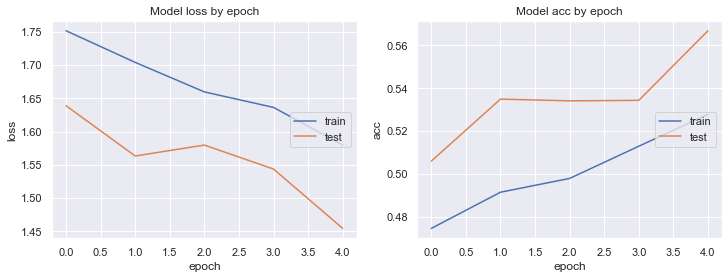

In [106]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc by epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.savefig('Graph_Plant_2.png')

In [14]:
#for layer in base_model.layers[-4:]:
 #   layer.trainable = True
from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(monitor = 'val_loss',
                        patience = 8,
                        mode = 'min',
                        restore_best_weights = True)

lr_plateau = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                            patience=4,
                            factor=0.5,
                            verbose=2,
                            mode='min')

checkpoint = callbacks.ModelCheckpoint(filepath='checkpoint', 
                                       monitor='val_loss',
                                       save_best_only=True,
                                        save_weights_only=False,
                                       mode='min',
                                       save_freq='epoch')

In [12]:
from tensorflow.keras.optimizers import Adam

model_T.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
history = model_T.fit(train_generator_H, 
                                epochs = 10,
                                steps_per_epoch = 1310//batch_size,
                                validation_data=test_generator_H,
                                validation_steps=334//batch_size,
                                callbacks = [early_stopping,lr_plateau,checkpoint])

Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.0742

INFO:tensorflow:Assets written to: checkpoint/assets


INFO:tensorflow:Assets written to: checkpoint/assets


40/40 [==============================] - 241s 6s/step - loss: 0.0000e+00 - accuracy: 0.0742 - val_loss: 0.0000e+00 - val_accuracy: 0.0562 - lr: 1.0000e-04
Epoch 2/10
40/40 [==============================] - 250s 6s/step - loss: 0.0000e+00 - accuracy: 0.0789 - val_loss: 0.0000e+00 - val_accuracy: 0.0594 - lr: 1.0000e-04
Epoch 3/10
40/40 [==============================] - 239s 6s/step - loss: 0.0000e+00 - accuracy: 0.0883 - val_loss: 0.0000e+00 - val_accuracy: 0.0750 - lr: 1.0000e-04
Epoch 4/10
40/40 [==============================] - 245s 6s/step - loss: 0.0000e+00 - accuracy: 0.0734 - val_loss: 0.0000e+00 - val_accuracy: 0.0938 - lr: 1.0000e-04
Epoch 5/10
40/40 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.0750
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
40/40 [==============================] - 237s 6s/step - loss: 0.0000e+00 - accuracy: 0.0750 - val_loss: 0.0000e+00 - val_accuracy: 0.0812 - lr: 1.0000e-04
Epoch 6/10
40/40 [

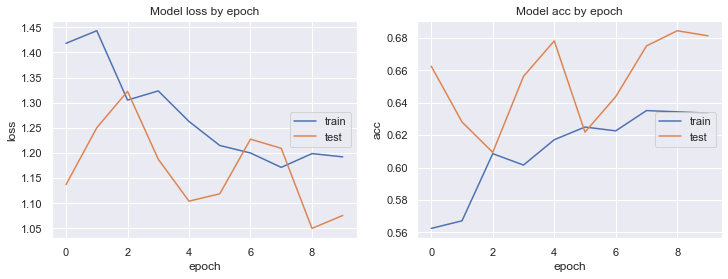

In [119]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model acc by epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.savefig('Graph_Plant_4.jpg')

In [15]:
from sklearn.svm import SVC
from tensorflow.keras.applications.vgg16 import preprocess_input
intermediate_layer_model = Model(inputs=model.input, outputs=model.layers[2].output)
X_train_features = intermediate_layer_model.predict(preprocess_input(X_train))
X_test_features = intermediate_layer_model.predict(preprocess_input(X_test))

svm = SVC(C=100)

svm.fit(X_train_features, Y_train)
svm.score(X_test_features, Y_test)

NameError: name 'model' is not defined

In [26]:
path = os.path.join('archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/')
print('[DEBUG] path:', path)

img = cv2.imread(path)

if img is None:
    print('Wrong path:', path)
else:
    img = cv2.resize(img, dsize=(128,128))
    pixels.append(img)

[DEBUG] path: archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/
Wrong path: archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/


[ WARN:0@3041.697] global loadsave.cpp:244 findDecoder imread_('archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/'): can't open/read file: check file path/integrity


In [10]:
X_train = X_train / 255
X_test = X_test / 255

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

inputs_dense = Input(shape = (224, 224,3), name = "Input")
dense_0 = Flatten()
dense_1 = Dense(units = 20, input_dim = 784, kernel_initializer ='normal', activation ='tanh')            
dense_2 = Dense(units = 2, kernel_initializer ='normal', activation ='softmax')

x = dense_0(inputs_dense)
x = dense_1(x)
outputs_dense=dense_2(x)

# CNN

inputs_cnn=Input(shape = (224, 224,3), name = "Input")
cnn_1 = Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', input_shape = (28, 28, 1), activation = 'relu')
cnn_2 = MaxPooling2D(pool_size = (2, 2))
cnn_3 = Dropout(rate = 0.2)
cnn_4 = Flatten()
cnn_5 = Dense(units = 128, activation = 'relu')
cnn_6 = Dense(units = 2, activation='softmax')

x=cnn_1(inputs_cnn)
x=cnn_2(x)
x=cnn_3(x)
x=cnn_4(x)
x=cnn_5(x)
outputs_cnn=cnn_6(x)

# Model
model_dense = Model(inputs = inputs_dense, outputs = outputs_dense)
model_cnn = Model(inputs = inputs_cnn, outputs = outputs_cnn)

# Compilation
model_dense.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])           
model_cnn.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])            

# Entraînement
#training_history_dense = model_dense.fit(X_train, Y_train, validation_split = 0.2, epochs = 16, batch_size = 200, verbose = 1)
#training_history_cnn = model_cnn.fit(X_train, Y_train, validation_split = 0.2, epochs = 16, batch_size = 200, verbose = 1)

NameError: name 'X_train' is not defined

In [2]:
batches_real = test_datagen.flow_from_directory('images', target_size = (512, 512), batch_size = 16, class_mode = 'categorical', seed=1234)
batches_augmented = train_datagen.flow_from_directory('images', target_size = (512, 512), batch_size = 16, class_mode = 'categorical', seed=1234)

x_batch_augmented, y_batch_augmented = next(batches_augmented)
x_batch_real, y_batch_real = next(batches_real)

for i in range(16):
    image_augmented = x_batch_augmented[i]
    image_real = x_batch_real[i]
    
    title_add_on = "random image"
    if y_batch_augmented[i][1]: title_add_on =  "santa"

    plt.subplot(221)
    plt.imshow(image_real)
    plt.title("original " + title_add_on)

        
    plt.subplot(222)
    plt.imshow(image_augmented)
    plt.title("augmented " + title_add_on)

    plt.show()

NameError: name 'test_datagen' is not defined

In [6]:
healthy = ['Apple___healthy','Blueberry___healthy','Cherry_(including_sour)___healthy','Corn_(maize)___healthy','Grape___healthy','Orange___Haunglongbing_(Citrus_greening)','Peach___healthy','Pepper,_bell___healthy','Raspberry___healthy','Potato___healthy','Soybean___healthy','Strawberry___healthy','Tomato___healthy']
#path = 'archive-2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/'
def load_data(path, healthy = healthy):
    img_list = []
    label_list = []
    for i in range(13):
        PATH = os.path.join(path,str(healthy[i]))+'/'
#PATH = os.path.join(path,str(art[0]))+'/'
        for filename in os.listdir(PATH):
            img=cv2.imread(os.path.join(PATH,filename))
            img=cv2.resize(img,(299,299))
            if img.shape==(299, 299):
                    img = img.reshape([299,299,1])
                    img = np.concatenate([img,img,img],axis=2)
            img_list.append(img[...,::-1])
            label_list.append(i+1)
    return np.array(img_list), np.array(label_list)

X_train, Y_train = load_data(path = 'archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/trainH/')
X_test, Y_test = load_data(path = 'archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/validH/')
a, b = np.unique(Y_train, return_counts= True)
print(a)
print(b)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[702 558 774 603 468 585 513 630 432 504 558 468 513]


In [7]:
X_train = X_train / 255
X_test = X_test / 255

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [6]:
from tensorflow.keras.applications.vgg16 import preprocess_input
train_data_generator = ImageDataGenerator(
        preprocessing_function = preprocess_input,
        # data augmentation
        rotation_range = 10,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        zoom_range = 1.1,
        rescale=1./255,
        horizontal_flip = True)

test_data_generator = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range = 10,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        zoom_range = 1.1,
        rescale=1./255,
        horizontal_flip = True)

batch_size = 32


train_generator_H = train_data_generator.flow_from_directory(directory="archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/trainH",
                                                           class_mode ="sparse",
                                                          target_size = (224 , 224), 
                                                          batch_size = batch_size)

test_generator_H = test_data_generator.flow_from_directory(directory="archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/validH",
                                                         class_mode ="sparse",
                                                        target_size = (224 , 224), 
                                                        batch_size = batch_size)

nb_img_train = train_generator_H.samples*0.1
nb_img_test = test_generator_H.samples*0.8


Found 7308 images belonging to 13 classes.
Found 6075 images belonging to 13 classes.


In [ ]:
#model_T.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) 

In [14]:
batch_size = 32
historyH = model_T.fit(X_train,Y_train,
                        epochs = 10,
                        steps_per_epoch = 1310//batch_size,
                        batch_size = 64,
                        validation_split=0.2,
                        verbose = 1,
                        callbacks = [early_stopping,lr_plateau])

NameError: name 'model_T' is not defined

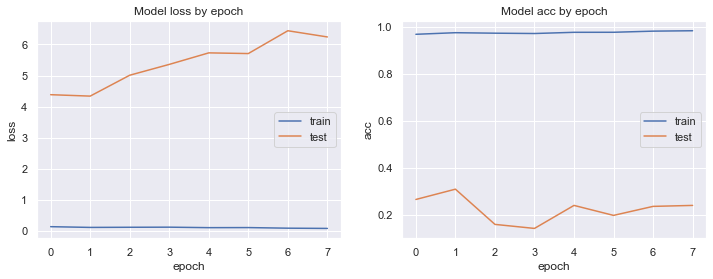

In [15]:
model.save("Peach_VGG16.h5")

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(historyH.history['loss'])
plt.plot(historyH.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(historyH.history['acc'])
plt.plot(historyH.history['val_acc'])
plt.title('Model acc by epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.savefig('Graph_Peach_1.jpg')

In [75]:
from tensorflow.keras.layers import Input
X_train = X_train / 255
X_test = X_test / 255

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

inputs_dense=Input(shape = (224, 224,3), name = "Input")
dense_0 = Flatten()
dense_1 = Dense(units = 20, input_dim = 784, kernel_initializer ='normal', activation ='tanh')            
dense_2 = Dense(units = 14, kernel_initializer ='normal', activation ='softmax')

x=dense_0(inputs_dense)
x=dense_1(x)
outputs_dense=dense_2(x)

# CNN
inputs_cnn=Input(shape = (224, 224,3), name = "Input")
cnn_1 = Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', input_shape = (64, 64, 1), activation = 'relu')
cnn_2 = MaxPooling2D(pool_size = (2, 2))
cnn_3 = Dropout(rate = 0.2)
cnn_4 = Flatten()
cnn_5 = Dense(units = 128, activation = 'relu')
cnn_6 = Dense(units = 14, activation='softmax')

x=cnn_1(inputs_cnn)
x=cnn_2(x)
x=cnn_3(x)
x=cnn_4(x)
x=cnn_5(x)
outputs_cnn=cnn_6(x)

# Model
model_dense = Model(inputs = inputs_dense, outputs = outputs_dense)
model_cnn = Model(inputs = inputs_cnn, outputs = outputs_cnn)

model_dense.summary()
print('Shape of X:', X_train.shape)
print('Shape of y:',Y_train.shape)

Model: "model_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 flatten_34 (Flatten)        (None, 150528)            0         
                                                                 
 dense_74 (Dense)            (None, 20)                3010580   
                                                                 
 dense_75 (Dense)            (None, 14)                294       
                                                                 
Total params: 3,010,874
Trainable params: 3,010,874
Non-trainable params: 0
_________________________________________________________________
Shape of X: (1926, 224, 224, 3)
Shape of y: (1926, 14)


In [76]:
# Compilation
model_dense.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])           
model_cnn.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])            

# Entraînement
training_history_dense = model_dense.fit(X_train, Y_train, validation_split = 0.2, epochs = 16, batch_size = 200, verbose = 1)
training_history_cnn = model_cnn.fit(X_train, Y_train, validation_split = 0.2, epochs = 16, batch_size = 200, verbose = 1)


Epoch 1/16
8/8 [==============================] - 1s 112ms/step - loss: 2.0389 - accuracy: 0.8701 - val_loss: 1.8294 - val_accuracy: 1.0000
Epoch 2/16
8/8 [==============================] - 0s 51ms/step - loss: 1.7178 - accuracy: 1.0000 - val_loss: 1.5658 - val_accuracy: 1.0000
Epoch 3/16
8/8 [==============================] - 0s 55ms/step - loss: 1.4600 - accuracy: 1.0000 - val_loss: 1.3186 - val_accuracy: 1.0000
Epoch 4/16
8/8 [==============================] - 0s 49ms/step - loss: 1.2229 - accuracy: 1.0000 - val_loss: 1.0967 - val_accuracy: 1.0000
Epoch 5/16
8/8 [==============================] - 0s 49ms/step - loss: 1.0134 - accuracy: 1.0000 - val_loss: 0.9046 - val_accuracy: 1.0000
Epoch 6/16
8/8 [==============================] - 0s 47ms/step - loss: 0.8342 - accuracy: 1.0000 - val_loss: 0.7433 - val_accuracy: 1.0000
Epoch 7/16
8/8 [==============================] - 0s 49ms/step - loss: 0.6856 - accuracy: 1.0000 - val_loss: 0.6116 - val_accuracy: 1.0000
Epoch 8/16
8/8 [==========

In [131]:
Apple = ['Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___healthy','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)']
#'Apple___Cedar_apple_rust','Apple___Apple_scab','Apple___Black_rot','Apple___healthy'

def load_data(path, Apple = Apple):
    img_list = []
    label_list = []
    for i in range(4):
        PATH = os.path.join(path,str(Apple[i]))+'/'
#PATH = os.path.join(path,str(art[0]))+'/'
        for filename in os.listdir(PATH):
            img=cv2.imread(os.path.join(PATH,filename))
            img=cv2.resize(img,(299,299))
            if img.shape==(299, 299):
                    img = img.reshape([299,299,1])
                    img = np.concatenate([img,img,img],axis=2)
            img_list.append(img[...,::-1])
            label_list.append(i+1)
    return np.array(img_list), np.array(label_list)


X_train, Y_train = load_data(path = 'archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/trainG/')
X_test, Y_test = load_data(path = 'archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/validG/')


In [10]:
a, b = np.unique(Y_test, return_counts= True) 
print(a)
print(b)
#valeurs_uniques = set(Apple)
print(valeurs_uniques)
X_train = X_train / 255
X_test = X_test / 255

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

[0. 1.]
[1800  900]
{'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_'}


In [41]:
from tensorflow.keras.layers import Input
X_train = X_train / 255
X_test = X_test / 255

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

# CNN
inputs_cnn=Input(shape = (224, 224,3), name = "Input")
cnn_1 = Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', input_shape = (64, 64, 1), activation = 'relu')
cnn_2 = MaxPooling2D(pool_size = (2, 2))
cnn_3 = Conv2D(filters = 16, kernel_size = (5, 5), padding = 'valid', input_shape = (32, 32, 1), activation = 'relu')
cnn_4 = MaxPooling2D(pool_size = (2, 2))
cnn_5 = Dropout(rate = 0.2)
cnn_6 = Flatten()
cnn_7 = Dense(units = 128, activation = 'relu')
cnn_8 = Dense(units = 5, activation='softmax')

x=cnn_1(inputs_cnn)
x=cnn_2(x)
x=cnn_3(x)
x=cnn_4(x)
x=cnn_5(x)
x=cnn_6(x)
x=cnn_7(x)
outputs_cnn=cnn_8(x)

model_A = Model(inputs = inputs_cnn, outputs = outputs_cnn)
model_A.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 106, 106, 16)      12816     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 53, 53, 16)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 53, 53, 16)        0   

In [ ]:
#model_A.compile(loss = 'categorical_crossentropy', 
 #               optimizer = 'adam', 
  #              metrics = ['accuracy'])            
#tensorflow.config.run_functions_eagerly(True)
#tensorflow.data.experimental.enable_debug_mode()
batch_size=32
history_A = model.fit(X_train,Y_train,
                        epochs = 10,
                        steps_per_epoch = 1300//batch_size,
                        batch_size = 84,
                        validation_split=0.2,
                        verbose = 1,
                        callbacks = [early_stopping,lr_plateau,checkpoint])


Epoch 1/10
 6/40 [===>..........................] - ETA: 31:14 - loss: 2.3704 - accuracy: 0.1071

190/190 [==============================] - 1024s 5s/step


ValueError: y should be a 1d array, got an array of shape (7308, 14) instead.

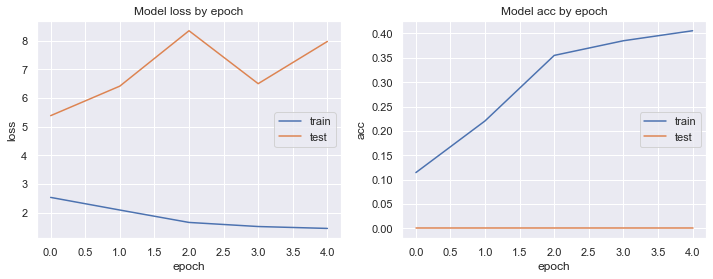

In [12]:
model.save("Healthy_VGG16.h5")
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(history_A.history['loss'])
plt.plot(history_A.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(history_A.history['acc'])
plt.plot(history_A.history['val_acc'])
plt.title('Model acc by epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.savefig('Healthy_VGG16_1.jpg')


In [6]:
from tensorflow.keras.applications.vgg16 import preprocess_input
train_data_generator = ImageDataGenerator(
        preprocessing_function = preprocess_input,
        rotation_range = 10,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        zoom_range = 1.1,
        rescale=1./255,
        horizontal_flip = True)

test_data_generator = ImageDataGenerator(
    preprocessing_function = preprocess_input,)
Tomato = ['Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___healthy','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_mosaic_virus','Tomato___Tomato_Yellow_Leaf_Curl_Virus','Apple___healthy','Blueberry___healthy','Cherry_(including_sour)___healthy','Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___healthy','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_mosaic_virus','Tomato___Tomato_Yellow_Leaf_Curl_Virus','Apple___healthy','Blueberry___healthy','Cherry_(including_sour)___healthy','Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)___Common_rust_','Corn_(maize)___healthy','Corn_(maize)___Northern_Leaf_Blight','Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___healthy','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Orange___Haunglongbing_(Citrus_greening)','Peach___healthy','Pepper,_bell___healthy','Potato___healthy','Raspberry___healthy','Soybean___healthy','Strawberry___healthy','Tomato___healthy']


def load_data(path, Tomato = Tomato):
    img_list = []
    label_list = []
    for i in range(38):
        PATH = os.path.join(path,str(Tomato[i]))+'/'
#PATH = os.path.join(path,str(art[0]))+'/'
        for filename in os.listdir(PATH):
            img=cv2.imread(os.path.join(PATH,filename))
            img=cv2.resize(img,(256,256))
            if img.shape==(256, 256):
                    img = img.reshape([256,256,1])
                    img = np.concatenate([img,img,img],axis=2)
            img_list.append(img[...,::-1])
            label_list.append(i+1)
    return np.array(img_list), np.array(label_list)

X_train, Y_train = load_data(path = 'archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/')
X_test, Y_test = load_data(path = 'archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/')
a, b = np.unique(Y_train, return_counts= True)
print(a)
print(b)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
[1702 1920 1926 1851 1882 1745 1741 1827 1790 1961 2008 1816 1826 1642
 1702 1920 1926 1851 1882 1745 1741 1827 1790 1961 2008 1816 1826 1642
 1907 1859 1908 1888 1920 1692 1722 2010 1728 1988]


In [34]:
from sklearn.svm import SVC
intermediate_layer_model = Model(inputs=model.input, outputs=model.layers[2].output)
X_train_features = intermediate_layer_model.predict(preprocess_input(X_train))
X_test_features = intermediate_layer_model.predict(preprocess_input(X_test))

svm = SVC(C=100)

svm.fit(X_train_features, Y_train)
svm.score(X_test_features, Y_test)

29/29 [==============================] - 34s 1s/step


ValueError: y should be a 1d array, got an array of shape (3598, 3) instead.

In [24]:
y_pred = model.predict(X_test)

29/29 [==============================] - 33s 1s/step


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [86]:
# CNN

inputs_cnn=Input(shape = (224, 224,3), name = "Input")
cnn_1 = Conv2D(filters = 144, kernel_size = (5, 5), padding = 'valid', input_shape = (64, 64, 1), activation = 'relu')
cnn_2 = MaxPooling2D(pool_size = (2, 2))
cnn_3 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'valid', input_shape = (64, 64, 1), activation = 'sigmoid')
cnn_4 = MaxPooling2D(pool_size = (2, 2))
cnn_5 = Conv2D(filters = 16, kernel_size = (2, 2), padding = 'valid', input_shape = (32, 32, 1), activation = 'relu')
cnn_6 = MaxPooling2D(pool_size = (2, 2))
cnn_7 = Dropout(rate = 0.2)
cnn_8 = Flatten()
cnn_9 = Dense(units = 64, activation = 'relu')
cnn_10 = Dense(units = 12, activation='softmax')

x=cnn_1(inputs_cnn)
x=cnn_2(x)
x=cnn_3(x)
x=cnn_4(x)
x=cnn_5(x)
x=cnn_6(x)
x=cnn_7(x)
x=cnn_8(x)
x=cnn_9(x)
outputs_cnn=cnn_10(x)

model = Model(inputs = inputs_cnn, outputs = outputs_cnn)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 220, 220, 144)     10944     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 144)    0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 108, 108, 32)      41504     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 53, 53, 16)        2064

In [11]:
from tensorflow.keras.applications.vgg16 import VGG16
n_class = 13
# Modèle VGG16
base_model = VGG16(weights='imagenet', include_top=False) 
# Freezer les couches du VGG16
for layer in base_model.layers: 
    layer.trainable = False

model_T = Sequential()
model_T.add(Input(shape = (224, 224,3), name = "Input"))
model_T.add(base_model) # Ajout du modèle VGG16
model_T.add(GlobalAveragePooling2D()) 
model_T.add(Dense(1024,activation='relu'))
model_T.add(Dropout(rate=0.2))
model_T.add(Dense(512,activation='relu'))
model_T.add(Dropout(rate=0.2))
model_T.add(Dense(1, activation='softmax'))

model_T.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model_T.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 1024)              525312    
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                      

In [8]:
from tensorflow import keras
batch_size=32
#from keras.applications.vgg16 import VGG16
#model = VGG16(weights = 'imagenet')
model = keras.models.load_model('healthy_IncepResnetV2.h5', compile=False)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])            
history_H = model.fit(X_train,Y_train,
                        validation_split = 0.2, 
                        epochs = 10, 
                        steps_per_epoch = 2400//batch_size,
                        batch_size = 200, 
                        verbose = 1,
                        callbacks = [early_stopping,lr_plateau,checkpoint])


2023-03-06 20:32:05.748865: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
75/75 [==============================] - ETA: 0s - loss: 0.4246 - accuracy: 0.8746 

INFO:tensorflow:Assets written to: checkpoint/assets


INFO:tensorflow:Assets written to: checkpoint/assets


75/75 [==============================] - 2289s 30s/step - loss: 0.4246 - accuracy: 0.8746 - val_loss: 18.8703 - val_accuracy: 0.1436 - lr: 0.0010
Epoch 2/10
75/75 [==============================] - 2289s 31s/step - loss: 0.2566 - accuracy: 0.9304 - val_loss: 19.0862 - val_accuracy: 0.2086 - lr: 0.0010
Epoch 3/10
75/75 [==============================] - 2323s 31s/step - loss: 0.2778 - accuracy: 0.9255 - val_loss: 19.6239 - val_accuracy: 0.0882 - lr: 0.0010
Epoch 4/10
75/75 [==============================] - 2256s 30s/step - loss: 0.2236 - accuracy: 0.9404 - val_loss: 22.0724 - val_accuracy: 0.1334 - lr: 0.0010
Epoch 5/10



Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
75/75 [==============================] - 213s 3s/step - loss: 0.2236 - accuracy: 0.9404 - val_loss: 22.0724 - val_accuracy: 0.1334 - lr: 0.0010


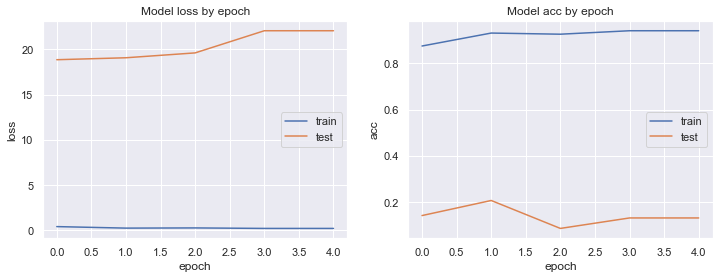

In [9]:
model.save("healthy_IncepResnetV2.h5")
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(history_H.history['loss'])
plt.plot(history_H.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(history_H.history['accuracy'])
plt.plot(history_H.history['val_accuracy'])
plt.title('Model acc by epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.savefig('healthy_IncepResnetV2_2.jpg')


In [61]:
from sklearn.metrics import confusion_matrix 
import seaborn as sn
#y_pred = model.predict(X_test).round()
print(metrics.classification_report(Y_test, y_pred))
metrics.confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
crosstab = pd.crosstab(Y_test.argmax(axis=1),y_pred.argmax(axis=1), rownames=['Classe réelle'], colnames=['Classe prédite'])

plt.figure(figsize = (14,10))
sn.heatmap(crosstab/np.sum(crosstab),fmt='.2%', annot=True,cmap='Blues')
plt.savefig('crosstab_H_small.png')

ValueError: Found input variables with inconsistent numbers of samples: [6075, 1343]

In [691]:
import tensorflow
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications import InceptionV3
n_class=38
#tensorflow.keras.applications.inception_v3.preprocess_input(model_A, data_format=None)
#i = tf.keras.layers.Input([None, None, 3], dtype = tf.uint8)
#x = tf.cast(i, tf.float32)
#x = tf.keras.applications.mobilenet.preprocess_input(x)
#core = tf.keras.applications.MobileNet()
#x = core(x)
#model = tf.keras.Model(inputs=[i], outputs=[x])

#image = tf.image.decode_png(tf.io.read_file('file.png'))
#result = model(image)
# Modèle Dense121
base_model = InceptionV3(include_top=True,weights="imagenet", input_tensor=None,input_shape=(299,299,3),
pooling=None,classes=1000,classifier_activation="softmax")
# Freezer les couches du inception
for layer in base_model.layers: 
    layer.trainable = False

model = Sequential()
model.add(base_model) # Ajout du modèle inception
model.add(BatchNormalization())
#model.add(Dense(1024,activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(512,activation='relu'))
model.add(Dropout(rate=0.2))
#model.add(Dense(382, activation='relu'))
model.add(Dense(144, activation='relu'))
#model.add(Dense(88, activation='sigmoid'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(n_class, activation='softmax'))

from keras.optimizers import Adamax

#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1000)              23851784  
                                                                 
 batch_normalization_394 (Ba  (None, 1000)             4000      
 tchNormalization)                                               
                                                                 
 dense_28 (Dense)            (None, 512)               512512    
                                                                 
 dropout_22 (Dropout)        (None, 512)               0         
                                                                 
 dense_29 (Dense)            (None, 144)               73872     
                                                                 
 dense_30 (Dense)            (None, 32)                4640      
                                                      

In [83]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import BatchNormalization
n_class=11

base_model = DenseNet121(include_top=True,weights="imagenet", input_tensor=None,
    input_shape=None,pooling=None,classes=1000,classifier_activation="softmax",)

for layer in base_model.layers: 
    layer.trainable = False

model_A = Sequential()
model_A.add(base_model) # Ajout du modèle inception
model_A.add(BatchNormalization())
model_A.add(Dense(1024,activation='relu'))
model_A.add(Dense(512,activation='relu'))
model_A.add(Dropout(rate=0.2))
model_A.add(Dense(382, activation='relu'))
model_A.add(Dense(144, activation='relu'))
model_A.add(Dense(88, activation='sigmoid'))
model_A.add(Dense(32, activation='relu'))
model_A.add(Dropout(rate=0.2))
model_A.add(Dense(n_class + 1, activation='softmax'))

model_A.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model_A.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1000)              8062504   
                                                                 
 batch_normalization (BatchN  (None, 1000)             4000      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1024)              1025024   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 382)               195966    
                                                      

In [439]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import DepthwiseConv2D
from tensorflow.keras.regularizers import L1,L2
input_shape=(1, 299, 299, 3)
n_class=37

base_model = InceptionResNetV2(include_top=True,weights="imagenet",input_tensor=None,
    input_shape=(299, 299, 3),pooling=None,classes=1000,classifier_activation="softmax")

for layer in base_model.layers: 
    layer.trainable = False

model_H = Sequential()
model_H.add(base_model) # Ajout du modèle inception
model_H.add(BatchNormalization())
model_H.add(Dense(64,  activation='relu'))
model_H.add(Dropout(rate=0.2))

model_H.add(Dense(128, activation='relu'))

model_H.add(Dense(256, activation='relu'))
model_H.add(Dropout(rate=0.2))

model_H.add(Dense(512, kernel_regularizer=L2(0.00001), activation='relu'))

model_H.add(Dense(1024,activity_regularizer=L2(0.0001),  activation='relu'))
model_H.add(Dropout(rate=0.2))

model_H.add(Dense(144, activation='relu'))
model_H.add(Dense(64, activation='relu'))
model_H.add(Dense(32, activation='relu'))
model_H.add(Dropout(rate=0.2))
model_H.add(Dense(n_class + 1, activation='softmax'))

#model_H.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_H.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1000)             55873736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1000)             4000      
 tchNormalization)                                               
                                                                 
 dense_12 (Dense)            (None, 64)                64064     
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 128)               8320      
                                                                 
 dense_14 (Dense)            (None, 256)              

In [435]:
# CNN
from tensorflow.keras.layers import DepthwiseConv2D, GlobalMaxPooling2D

#DepthwiseConv2D(kernel_size,strides=(1, 1),padding="valid",depth_multiplier=1,
 #   data_format=None,dilation_rate=(1, 1),activation=None,use_bias=True,depthwise_initializer="glorot_uniform",
  #  bias_initializer="zeros",depthwise_regularizer=None,bias_regularizer=None,activity_regularizer=None,depthwise_constraint=None,
   # bias_constraint=None,**kwargs)

inputs_cnn=Input(shape = (299, 299,3), name = "Input")
cnn_1 = Conv2D(filters = 64, kernel_size = (16, 16), padding = 'valid', input_shape = (64, 64, 1), activation = 'relu')
cnn_24 = DepthwiseConv2D(kernel_size = (14, 14),strides=(1, 1),padding="valid")
cnn_2 = MaxPooling2D(pool_size = (2, 2))
cnn_3 = Conv2D(filters = 256, kernel_size = (8, 8), padding = 'valid', input_shape = (32, 32, 1), activation = 'relu')
cnn_25 = DepthwiseConv2D(kernel_size = (8, 8),strides=(1, 1),padding="valid")
cnn_4 = MaxPooling2D(pool_size = (2, 2))
cnn_21 = Dropout(rate = 0.2)
cnn_5 = Conv2D(filters = 512, kernel_size = (5, 5), padding = 'valid', input_shape = (64, 64, 1), activation = 'relu')
cnn_6 = MaxPooling2D(pool_size = (2, 2))
cnn_7 = Conv2D(filters = 512, kernel_size = (5, 5), padding = 'valid', input_shape = (32, 32, 1), activation = 'relu')
cnn_26 = DepthwiseConv2D(kernel_size = (4, 4),strides=(1, 1),padding="valid")
cnn_8 = MaxPooling2D(pool_size = (2, 2))
cnn_22 = Dropout(rate = 0.2)
cnn_9 = Conv2D(filters = 1024, kernel_size = (3, 3), padding = 'valid', input_shape = (64, 64, 1), activation = 'relu')
cnn_10 = MaxPooling2D(pool_size = (2, 2))
cnn_11 = Conv2D(filters = 1024, kernel_size = (2, 2), padding = 'valid', input_shape = (32, 32, 1), activation = 'relu')
cnn_12 = MaxPooling2D(pool_size = (1, 1))
cnn_23 = Dropout(rate = 0.2)
cnn_13 = Conv2D(filters = 1024, kernel_size = (1, 1), padding = 'valid', input_shape = (64, 64, 1), activation = 'sigmoid')
cnn_14 = MaxPooling2D(pool_size = (1, 1))
cnn_15 = Conv2D(filters = 2048, kernel_size = (1, 1), padding = 'valid', input_shape = (32, 32, 1), activation = 'relu')
cnn_16 = MaxPooling2D(pool_size = (1, 1))
cnn_17 = Dropout(rate = 0.2)
cnn_18 = Flatten()
cnn_19 = Dense(units = 128, activation = 'relu')
cnn_20 = Dense(units = 38, activation='softmax')

x=cnn_1(inputs_cnn)
x=cnn_24(x)
x=cnn_2(x)
x=cnn_3(x)
x=cnn_25(x)
x=cnn_4(x)
x=cnn_21(x)
x=cnn_5(x)
x=cnn_6(x)
x=cnn_7(x)
x=cnn_26(x)
x=cnn_8(x)
x=cnn_22(x)
x=cnn_9(x)
x=cnn_10(x)
x=cnn_11(x)
x=cnn_12(x)
x=cnn_23(x)
x=cnn_13(x)
x=cnn_14(x)
x=cnn_15(x)
x=cnn_16(x)
x=cnn_17(x)
x=cnn_18(x)
x=cnn_19(x)
outputs_cnn=cnn_20(x)

model = Model(inputs = inputs_cnn, outputs = outputs_cnn)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 299, 299, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 284, 284, 64)      49216     
                                                                 
 depthwise_conv2d_3 (Depthwi  (None, 271, 271, 64)     12608     
 seConv2D)                                                       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 135, 135, 64)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 256)     1048832   
                                                                 
 depthwise_conv2d_4 (Depthwi  (None, 121, 121, 256)    1664

In [61]:
history_H = model.fit()
for i in y_train :
    if y_train[1] :
        
        history_i1 = model.fit()

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [8]:
import glob
import itertools
from tqdm import tqdm

In [9]:
# Trouver tous les chemins vers les fichiers qui finissent par .jpg
liste = glob.glob('archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/*/*.JPG')
liste_2 = glob.glob('archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/*/*.jpg')
liste_3 = glob.glob('archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/*/*.jpeg')
liste_V = glob.glob('archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/test/*.JPG')
# Remplacer les \\ par /
liste=list(map(lambda x: x.replace("\\","/"),liste))
liste = list(map(lambda x : [x, x.split('/')[4]], liste))
liste_2=list(map(lambda x: x.replace("\\","/"),liste_2))
liste_3=list(map(lambda x: x.replace("\\","/"),liste_3))
liste_3=list(map(lambda x: x.replace("jpeg","JPG"),liste_3))
liste_3 = list(map(lambda x : [x, x.split('/')[4]], liste_3))
liste_2=list(map(lambda x: x.replace("jpg","JPG"),liste_2))
liste_2 = list(map(lambda x : [x, x.split('/')[4]], liste_2))
liste_V=list(map(lambda x: x.replace("jpg","JPG"),liste_V))
liste_V = list(map(lambda x : [x, x.split('/')[4]], liste_V))
# Créer un DataFrame pandas
liste = liste + liste_2 + liste_3
df = pd.DataFrame(liste, columns=['filepath', 'nameLabel',])
df_V = pd.DataFrame(liste_V, columns=['filepath', 'nameLabel'])
df['label'] = df['nameLabel'].replace(df.nameLabel.unique(), [*range(len(df.nameLabel.unique()))])
df_V['label'] = ''
#df = pd.concat([df,df_2], axis = 0)
df.head()

,filepath,nameLabel,label
0,archive/New Plant Diseases Dataset(Augmented)/...,Strawberry___healthy,0
1,archive/New Plant Diseases Dataset(Augmented)/...,Strawberry___healthy,0
2,archive/New Plant Diseases Dataset(Augmented)/...,Strawberry___healthy,0
3,archive/New Plant Diseases Dataset(Augmented)/...,Strawberry___healthy,0
4,archive/New Plant Diseases Dataset(Augmented)/...,Strawberry___healthy,0


In [10]:
df['nameLabel'].value_counts()

Soybean___healthy                                     2022
Apple___Apple_scab                                    2016
Orange___Haunglongbing_(Citrus_greening)              2010
Apple___healthy                                       2008
Pepper,_bell___healthy                                1988
Apple___Black_rot                                     1987
Tomato___Tomato_Yellow_Leaf_Curl_Virus                1961
Potato___Early_blight                                 1939
Potato___Late_blight                                  1939
Tomato___healthy                                      1926
Tomato___Early_blight                                 1920
Grape___Esca_(Black_Measles)                          1920
Pepper,_bell___Bacterial_spot                         1913
Corn_(maize)___Northern_Leaf_Blight                   1908
Corn_(maize)___Common_rust_                           1907
Grape___Black_rot                                     1888
Tomato___Leaf_Mold                                    18

In [11]:
df.groupby('nameLabel').agg({'label':'unique'})
healthy = df[df['nameLabel'] == 'Strawberry___Leaf_scorch']
df_Apple_H = df[df['label'] == 34]
df_blue_H = df[df['label'] == 3]
df_Cherry_h = df[df['label'] == 23]
df_Corn_h = df[df['label'] == 4]
df_Grape_h = df[df['label'] == 17]
df_Orange_h = df[df['label'] == 11]
df_Peach_H = df[df['label'] == 6]
df_Pepper_H = df[df['label'] == 10]
df_Rasp_H = df[df['label'] == 21]
df_Potato_H = df[df['label'] == 36]
df_Soy_H = df[df['label'] == 37]
df_Straw_H = df[df['label'] == 0]
df_Tomato_H = df[df['label'] == 22]
df_Squash_H = df[df['label'] == 31]

df_H = pd.concat([df_Squash_H,df_Apple_H,df_blue_H,df_Cherry_h,df_Corn_h,df_Grape_h,df_Orange_h,df_Peach_H,df_Pepper_H,df_Rasp_H,df_Potato_H,df_Soy_H,df_Straw_H,df_Tomato_H],axis=0)
df_H['label'] = df_H['nameLabel'].replace(df_H.nameLabel.unique(), [*range(len(df_H.nameLabel.unique()))])
z = df.groupby('nameLabel').agg({'label':'unique'})
#df[df['nameLabel']=='Corn_(maize)___healthy'] = df[df['nameLabel']=='Corn_(maize)___healthy'].replace(to_replace=[0],value=[2])
#df[df['nameLabel']=='Tomato___healthy'] = df[df['nameLabel']=='Tomato___healthy'].replace(to_replace=[2],value=[8])
#df[df['nameLabel']=='Pepper,_bell___healthy'] = df[df['nameLabel']=='Pepper,_bell___healthy'].replace(to_replace=[1],value=[4])
#df[df['nameLabel']=='Squash___Powdery_mildew'] = df[df['nameLabel']=='Squash___Powdery_mildew'].replace(to_replace=[3],value=[10])

,filepath,nameLabel,label
0,archive/New Plant Diseases Dataset(Augmented)/...,Strawberry___healthy,0
1,archive/New Plant Diseases Dataset(Augmented)/...,Strawberry___healthy,0
2,archive/New Plant Diseases Dataset(Augmented)/...,Strawberry___healthy,0
3,archive/New Plant Diseases Dataset(Augmented)/...,Strawberry___healthy,0
4,archive/New Plant Diseases Dataset(Augmented)/...,Strawberry___healthy,0
...,...,...,...
70290,archive/New Plant Diseases Dataset(Augmented)/...,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,32
70291,archive/New Plant Diseases Dataset(Augmented)/...,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,32
70292,archive/New Plant Diseases Dataset(Augmented)/...,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,32
70293,archive/New Plant Diseases Dataset(Augmented)/...,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,32


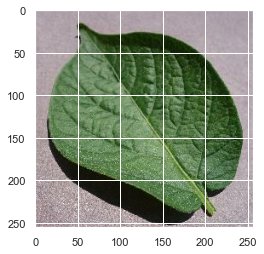

In [566]:
import tensorflow as tf
#affichage d'une image du dataset

# Chemin de l'image
filepath = df_V['filepath'][3]

# Lecture du fichier
im = tf.io.read_file(filepath)

# On décode le fichier
im = tf.image.decode_jpeg(im, channels=3)

# Affichage du tensor
plt.imshow(im);


In [432]:
X_train_path, X_test_path, y_train, y_test = train_test_split(df.filepath, df.label, train_size=0.8, random_state=1234)

X_test = []
for filepath in tqdm(X_test_path):
    # Lecture du fichier
    im = tensorflow.io.read_file(filepath)
    # On décode le fichier
    im = tensorflow.image.decode_jpeg(im, channels=3)
    # Redimensionnement
    im = tensorflow.image.resize(im, size=(299, 299))
    X_test.append([im])
    
X_test = tensorflow.concat(X_test, axis=0)

100%|██████████| 14059/14059 [00:44<00:00, 313.30it/s]


In [694]:
@tensorflow.function
def load_image(filepath, resize=(299, 299)):
    im = tensorflow.io.read_file(filepath)
    im = tensorflow.image.decode_png(im, channels=3)
    return tensorflow.image.resize(im, resize)

dataset_train = tensorflow.data.Dataset.from_tensor_slices((X_train_path, y_train))

dataset_train = dataset_train.map(lambda x, y : [load_image(x), y], num_parallel_calls=-1).batch(32)

In [697]:
from tensorflow import keras
batch_size=32
#model = keras.models.load_model('healthy_VGG16_14.h5')
#model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
#from tensorflow.keras.applications.vgg16 import VGG16
#n_class = 38
from tensorflow.keras.layers import DepthwiseConv2D, GlobalMaxPooling2D
#DepthwiseConv2D(kernel_size,strides=(1, 1),padding="valid",depth_multiplier=1,
 #   data_format=None,dilation_rate=(1, 1),activation=None,use_bias=True,depthwise_initializer="glorot_uniform",
  #  bias_initializer="zeros",depthwise_regularizer=None,bias_regularizer=None,activity_regularizer=None,depthwise_constraint=None,
   # bias_constraint=None,**kwargs)
# Modèle VGG16
#base_model = VGG16(weights='imagenet', include_top=False) 
# Freezer les couches du VGG16
#for layer in base_model.layers: 
 #   layer.trainable = False

#model = Sequential()
#model.add(Input(shape = (224, 224,3), name = "Input"))
#model.add(base_model) # Ajout du modèle VGG16
#model.add(GlobalAveragePooling2D()) 
#model.add(Dense(1024,activation='relu'))
#model.add(Dropout(rate=0.2))
#model.add(Dense(512,activation='relu'))
#model.add(Dropout(rate=0.2))
#model.add(Dense(n_class, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
#model.summary()

history = model.fit(dataset_train,
                    epochs = 10,
                    validation_data=(X_test, y_test), 
                    steps_per_epoch = 2400//batch_size,
                    batch_size = 144,
                    callbacks=[early_stopping,lr_plateau, checkpoint])

Epoch 1/10
75/75 [==============================] - 995s 13s/step - loss: 3.6144 - acc: 0.0442 - val_loss: 3.5914 - val_acc: 0.0530 - lr: 0.0010
Epoch 2/10
75/75 [==============================] - 984s 13s/step - loss: 3.5732 - acc: 0.0550 - val_loss: 3.5610 - val_acc: 0.0619 - lr: 0.0010
Epoch 3/10
75/75 [==============================] - 990s 13s/step - loss: 3.5428 - acc: 0.0542 - val_loss: 3.5164 - val_acc: 0.0631 - lr: 0.0010
Epoch 4/10
75/75 [==============================] - 977s 13s/step - loss: 3.5379 - acc: 0.0583 - val_loss: 3.5157 - val_acc: 0.0640 - lr: 0.0010
Epoch 5/10
75/75 [==============================] - 973s 13s/step - loss: 3.5164 - acc: 0.0679 - val_loss: 3.4854 - val_acc: 0.0681 - lr: 0.0010
Epoch 6/10
75/75 [==============================] - 974s 13s/step - loss: 3.4992 - acc: 0.0583 - val_loss: 3.4759 - val_acc: 0.0693 - lr: 0.0010
Epoch 7/10
75/75 [==============================] - 977s 13s/step - loss: 3.5104 - acc: 0.0688 - val_loss: 3.4762 - val_acc: 0.063

14927     9
3223      1
21105    12
18794    11
13248     8
         ..
17048    10
23924    13
23605    13
1318      0
1111      2
Name: label, Length: 20832, dtype: int64


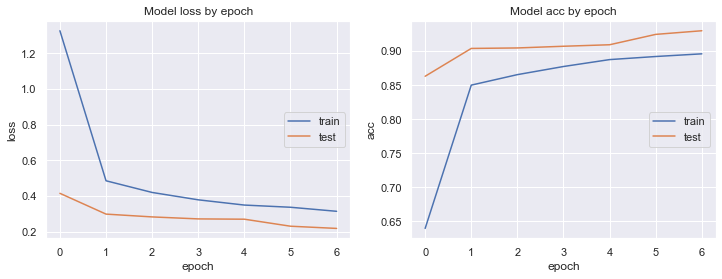

In [17]:
#model.save("ALL_VGG16_14.h5")
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc by epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

#plt.savefig('graph_ALL_VGG16_2.jpg')

In [13]:

y_prob = model.predict(X_test)

# Prédiction de la classe
y_pred = tensorflow.argmax(y_prob, axis=-1).numpy()

NameError: name 'X_test' is not defined

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [696]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print('Accuracy :', accuracy_score(y_test, y_pred))
cnf_matrix=confusion_matrix(y_test, y_pred)
cnf_matrix

Accuracy : 0.017497688313535813


array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [3, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

/var/folders/7f/1dyw4vh16jx3zq7t266nc56m0000gn/T/ipykernel_71691/718930383.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


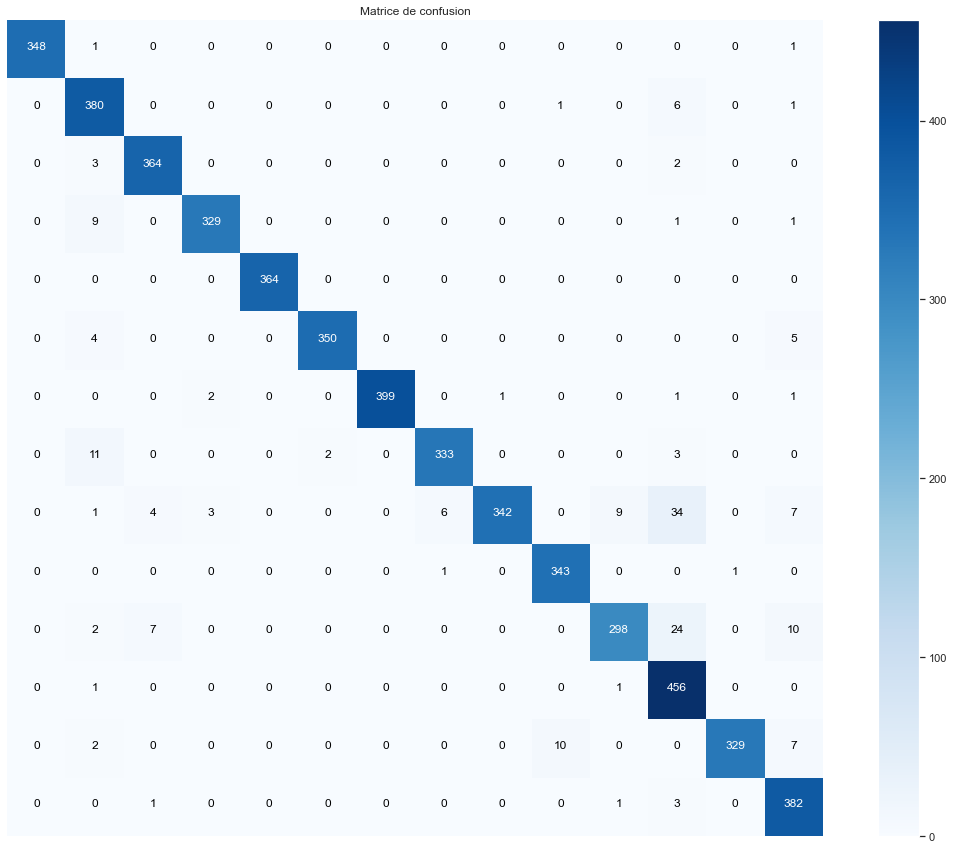

In [326]:
import itertools
classes = range(0,13)

plt.figure(figsize=(20,15))

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.axis('off')
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
#plt.show()
plt.savefig('crosstab_Health_VGG16_3.png')

In [14]:
#y_test=y_test.reset_index()    
@tensorflow.function
def load_image(filepath, resize=(224, 224)):
    im = tensorflow.io.read_file(filepath)
    im = tensorflow.image.decode_png(im, channels=3)
    return tensorflow.image.resize(im, resize)

data = df.label[0:33]
dataset_test = tensorflow.data.Dataset.from_tensor_slices((df_V.filepath, data))
dataset_test = dataset_test.map(lambda x, y : [load_image(x), y], num_parallel_calls=-1).batch(32)
#indices_random = tf.random.uniform(len(X_test), dtype=tf.int32)
model_H = keras.models.load_model('ALL_VGG16_14.h5')
y_prob = model_H.predict(dataset_test)

# Prédiction de la classe
y_pred = tensorflow.argmax(y_prob, axis=-1).numpy()

#df.nameLabel.unique()[y_pred[0]]
#df.nameLabel[y_pred[y_pred==11[0]]

2/2 [==============================] - 5s 212ms/step


In [15]:
indices_random = tf.random.uniform([3], 0, len(X_test), dtype=tf.int32)

plt.figure(figsize=(15,7))
for i, idx in enumerate(indices_random):
    plt.subplot(1,3,i+1)
    plt.imshow(tf.cast(X_test[idx], tf.int32))
    plt.xticks([])
    plt.yticks([])
    plt.title('Pred class : {} \n Real class : {}'.format(df.nameLabel.unique()[y_pred[idx]], df.nameLabel.unique()[y_test.values[idx]]))

NameError: name 'X_test' is not defined

In [207]:
#for i in range(X_test,y_pred):
 #   i = 1
  #  result = X_test[y_pred==i]
   # return result
#X_test[y_pred==1].shape
#X_test[y_pred==1]

def healthy(train_H):
    batch_size=32
    early_stopping = callbacks.EarlyStopping(monitor = 'val_loss',patience = 8,mode = 'min',restore_best_weights = True)
    lr_plateau = callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience=4,factor=0.5,verbose=2,mode='min')
    checkpoint = callbacks.ModelCheckpoint(filepath='checkpoint', monitor='val_loss',save_best_only=True,save_weights_only=False,mode='min',save_freq='epoch')
    model = keras.models.load_model('ALL_VGG16_14.h5')
    history = model.fit(dataset_train,epochs = 1,validation_data=(X_test, y_test), steps_per_epoch = 2400//batch_size,
                        batch_size = 144,callbacks=[early_stopping,lr_plateau, checkpoint])
    y_prob = model.predict(X_test)
    y_pred = tensorflow.argmax(y_prob, axis=-1).numpy()
    for i in y_pred:
    if i == 1 :
        model = keras.models.load_model('Strawberry_Dense121.h5')
    if i == 2 :
        print('Une seule classe de plante')
    if i == 3 :
        model = keras.models.load_model('Peach_D121.h5')
    if i ==4 :
        model = keras.models.load_model('Pepper_Dense121.h5')
    if i == 5 :
        print('Une seule classe de plante')
    if i == 6 :
        model = keras.models.load_model('Grap_IncepV3.h5')
    if i == 7 :
        model = keras.models.load_model('Corn_model_D121.h5')
    if i == 9 :
        print('Une seule classe de plante')
    if i == 10 :
        model = keras.models.load_model('Tomato_IncepResnetV2.h5')
    if i == 11 :
        model = keras.models.load_model('Cherry_D121.h5')
    if i == 12 :
        print('Une seule classe de plante')
    if i == 13 :
        model = keras.models.load_model('Apple_model_D121.h5')
    if i == 0 :
        model = keras.models.load_model('Patate_V0.h5')

IndentationError: expected an indented block (1258013312.py, line 19)

In [545]:
#df.nameLabel.unique()[y_pred[6]]
#y_pred[y_pred==0[0]]
#df.nameLabel[y_pred[y_pred==11[0]]
df.nameLabel[y_pred[11]]

'Strawberry___healthy'

In [420]:
for i in y_pred: 
    if y_pred[y_pred==i][0] == 0 :
        df_Straw_H = df[df['label'] == 0]
        df_Straw_L = df[df['label'] == 35]
        df_S = pd.concat([df_Straw_H, df_Straw_L],axis=0)
        df_S['label'] = df_H['nameLabel'].replace(df_S.nameLabel.unique(), [*range(len(df_S.nameLabel.unique()))])
        #model_S = keras.models.load_model('Strawberry_Dense121.h5')
        n_class = 2
        base_model = VGG16(weights='imagenet', include_top=False) 
        for layer in base_model.layers: 
            layer.trainable = False
        model_S = Sequential()
        model_S.add(Input(shape = (299, 299,3), name = "Input"))
        model_S.add(base_model) # Ajout du modèle VGG16
        model_S.add(GlobalAveragePooling2D()) 
        model_S.add(Dense(1024,activation='relu'))
        model_S.add(Dropout(rate=0.2))
        model_S.add(Dense(512,activation='relu'))
        model_S.add(Dropout(rate=0.2))
        model_S.add(Dense(n_class, activation='softmax'))
        model_S.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
        y_prob = model_S.predict(X_test)
        y_pred = tensorflow.argmax(y_prob, axis=-1).numpy()

163/163 [==============================] - 1507s 9s/step


IndexError: index 0 is out of bounds for axis 0 with size 0

In [554]:
liste_V = glob.glob('archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/*/*.JPG')
liste_V = list(map(lambda x: x.replace("\\","/"),liste_V))
liste_V = list(map(lambda x : [x, x.split('/')[4]], liste_V))
dv = pd.DataFrame(liste_V, columns=['filepath', 'nameLabel'])
dv['label'] = dv['nameLabel'].replace(dv.nameLabel.unique(), [*range(len(dv.nameLabel.unique()))])
dv.groupby('nameLabel').agg({'label':'unique'})
df.head()

,filepath,nameLabel,label
0,archive/New Plant Diseases Dataset(Augmented)/...,Strawberry___healthy,NaN
1,archive/New Plant Diseases Dataset(Augmented)/...,Strawberry___healthy,NaN
2,archive/New Plant Diseases Dataset(Augmented)/...,Strawberry___healthy,NaN
3,archive/New Plant Diseases Dataset(Augmented)/...,Strawberry___healthy,NaN
4,archive/New Plant Diseases Dataset(Augmented)/...,Strawberry___healthy,NaN


In [16]:
df_V.label = y_pred
#df_V.to_csv('plant_V.csv')
#df.nameLabel.unique()[plant.label == 6][0]
df.nameLabel.unique()[y_pred[11]]
df.nameLabel.unique()[5]
plant = pd.read_csv('plant_V.csv')
plant.head(25)

,Unnamed: 0.1,Unnamed: 0,filepath,nameLabel,label,Classe
0,0,0,archive/New Plant Diseases Dataset(Augmented)/...,AppleScab3.JPG,25,Apple___Apple_scab
1,1,1,archive/New Plant Diseases Dataset(Augmented)/...,TomatoEarlyBlight2.JPG,8,Tomato___Late_blight
2,2,2,archive/New Plant Diseases Dataset(Augmented)/...,TomatoEarlyBlight3.JPG,5,Tomato___Target_Spot
3,3,3,archive/New Plant Diseases Dataset(Augmented)/...,PotatoHealthy1.JPG,36,Potato___healthy
4,4,4,archive/New Plant Diseases Dataset(Augmented)/...,AppleScab2.JPG,25,Apple___Apple_scab
5,5,5,archive/New Plant Diseases Dataset(Augmented)/...,TomatoEarlyBlight1.JPG,8,Tomato___Late_blight
6,6,6,archive/New Plant Diseases Dataset(Augmented)/...,PotatoHealthy2.JPG,36,Potato___healthy
7,7,7,archive/New Plant Diseases Dataset(Augmented)/...,AppleScab1.JPG,25,Apple___Apple_scab
8,8,8,archive/New Plant Diseases Dataset(Augmented)/...,TomatoEarlyBlight4.JPG,18,Tomato___Early_blight
9,9,9,archive/New Plant Diseases Dataset(Augmented)/...,TomatoEarlyBlight5.JPG,18,Tomato___Early_blight


In [687]:
plant = pd.read_csv('plant_V.csv')
plant.head()
plant['Classe'] = ''
#plant[plant['label']==25] = plant['Classe'].replace(to_replace='',value='Apple___Apple_scab')
plant[plant['label']==25] 
plant['Classe'][0] = df.nameLabel.unique()[25]
plant['Classe'][1] = df.nameLabel.unique()[8]
plant['Classe'][2] = df.nameLabel.unique()[5]
plant['Classe'][3] = df.nameLabel.unique()[36]
plant['Classe'][4] = df.nameLabel.unique()[25]
plant['Classe'][5] = df.nameLabel.unique()[8]
plant['Classe'][6] = df.nameLabel.unique()[36]
plant['Classe'][7] = df.nameLabel.unique()[25]
plant['Classe'][8] = df.nameLabel.unique()[18]
plant['Classe'][9] = df.nameLabel.unique()[18]
plant['Classe'][10] = df.nameLabel.unique()[18]
plant['Classe'][11] = df.nameLabel.unique()[2]
plant['Classe'][12] = df.nameLabel.unique()[2]
plant['Classe'][13] = df.nameLabel.unique()[2]
plant['Classe'][14] = df.nameLabel.unique()[7]
plant['Classe'][15] = df.nameLabel.unique()[2]
plant['Classe'][16] = df.nameLabel.unique()[24]
plant['Classe'][17] = df.nameLabel.unique()[24]
plant['Classe'][18] = df.nameLabel.unique()[24]
plant['Classe'][19] = df.nameLabel.unique()[8]
plant['Classe'][20] = df.nameLabel.unique()[24]
plant['Classe'][21] = df.nameLabel.unique()[22]
plant['Classe'][22] = df.nameLabel.unique()[24]
plant['Classe'][23] = df.nameLabel.unique()[22]
plant['Classe'][24] = df.nameLabel.unique()[22]
plant['Classe'][25] = df.nameLabel.unique()[24]
plant['Classe'][26] = df.nameLabel.unique()[15]
plant['Classe'][27] = df.nameLabel.unique()[19]
plant['Classe'][28] = df.nameLabel.unique()[15]
plant['Classe'][29] = df.nameLabel.unique()[15]
plant['Classe'][30] = df.nameLabel.unique()[19]
plant['Classe'][31] = df.nameLabel.unique()[19]
plant['Classe'][32] = df.nameLabel.unique()[15]
plant.to_csv('plant_V.csv')

/var/folders/7f/1dyw4vh16jx3zq7t266nc56m0000gn/T/ipykernel_71691/1476009979.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plant['Classe'][0] = df.nameLabel.unique()[25]
/var/folders/7f/1dyw4vh16jx3zq7t266nc56m0000gn/T/ipykernel_71691/1476009979.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plant['Classe'][1] = df.nameLabel.unique()[8]
/var/folders/7f/1dyw4vh16jx3zq7t266nc56m0000gn/T/ipykernel_71691/1476009979.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [17]:
import tensorflow as tf
import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import DenseNet121
def show_img(img):
    art = ['Strawberry___healthy','Strawberry___Leaf_scorch']
    filepath = "archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/trainA/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG"
    im = tf.io.read_file(filepath)
    im = tf.image.decode_jpeg(im, channels=3)
    model = keras.models.load_model('Apple_model_D121.h5')
    prediction = model.predict(tf.expand_dims(img, axis=0))[0]
    indices_random = tf.random.uniform([1], 0, len('filepath'), dtype=tf.int32)
    for i, idx in enumerate(indices_random):
        plt.title('Cette image est : {}'.format( dv.nameLabel.unique()[dv.label.values[img]]))
    
show_img(9)


ValueError: in user code:

    File "/Users/dalvikloger/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "/Users/dalvikloger/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/dalvikloger/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/dalvikloger/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1791, in predict_step
        return self(x, training=False)
    File "/Users/dalvikloger/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/dalvikloger/opt/anaconda3/lib/python3.9/site-packages/keras/engine/input_spec.py", line 214, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "densenet121" (type Functional).
    
    Input 0 of layer "zero_padding2d_4" is incompatible with the layer: expected ndim=4, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer "densenet121" (type Functional):
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=False
      • mask=None


In [18]:
def show_img(img):
    model=tf.keras.models.load_model('ALL_VGG16_14.h5')
    prediction = model.predict(tf.expand_dims(img, axis=0))[0]
    genre_pred = 'homme' if prediction[0].round() == 0 else 'femme'
    plt.imshow(img.numpy().reshape(48,48),cmap = "gray")
    plt.title('Genre prédit :' + genre_pred +' with ' + str(int(abs(1-prediction[0].round() - prediction[0])*100)) +'%')
    return

In [21]:
#img = np.array(Image.open(io.BytesIO(base64.b64decode(imageWebCam.split(',')[1]))))[:,:,0:3]
show_img()

TypeError: show_img() missing 1 required positional argument: 'img'

AttributeError: module 'streamlit' has no attribute 'streamlit'

Content-type: text/html; charset=utf-8


<html><head><title>Répertoire local</title></head><body>
Le fichier CGI se trouve dans :


NameError: name '__file__' is not defined